# Exercise 1

Assume that there are 10 quanta available in a nerve terminal, and for a given release event each is released with a probability of 0.2. For one such event, what is the probability that 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, or 10 quanta will be released?

In [5]:
import numpy as np
import random as rnd
import collections
import matplotlib.pyplot as plt
import time
import scipy.stats as st
import scipy.special as sp

from scipy.stats import bernoulli, binom, poisson, chi2
from IPython.display import clear_output
from operator import itemgetter
from statsmodels.stats import proportion
from scipy.special import comb

from numpy import matlib

# Parameters
n = 10      # number of quanta
p = 0.2     # release probability

# Compute binomial probabilities
probabilities = []
for k in range(n+1):
    Pk = comb(n, k) * (p**k) * ((1-p)**(n-k))
    probabilities.append(Pk)
    print(f"{k} quanta released: {Pk:.10f} ({Pk*100:.4f}%)")

# Check that total probability sums to 1
print(f"\nSum of probabilities = {sum(probabilities):.10f}")


0 quanta released: 0.1073741824 (10.7374%)
1 quanta released: 0.2684354560 (26.8435%)
2 quanta released: 0.3019898880 (30.1990%)
3 quanta released: 0.2013265920 (20.1327%)
4 quanta released: 0.0880803840 (8.8080%)
5 quanta released: 0.0264241152 (2.6424%)
6 quanta released: 0.0055050240 (0.5505%)
7 quanta released: 0.0007864320 (0.0786%)
8 quanta released: 0.0000737280 (0.0074%)
9 quanta released: 0.0000040960 (0.0004%)
10 quanta released: 0.0000001024 (0.0000%)

Sum of probabilities = 1.0000000000


# Exercise 2
Let's say you know that a given nerve terminal contains exactly 14 quanta available for release. You have read in the literature that the release probability of these quanta is low, say 0.1. To assess whether this value is reasonable, you run a simple experiment: activate the nerve and measure the number of quanta that are released. The result is 8 quanta. What is the probability that you would get this result (8 quanta) if the true probability of release really was 0.1? What about if the true release probability was much higher; say, 0.7? What about for each decile of release probability (0.1, 0.2, ... 1.0)? Which value of release probability did you determine to be the most probable, given your measurement?

In [ ]:
from math import comb

n = 14   # quanta available
k = 8    # observed released

# Compute for each decile
for p in [i/10 for i in range(1, 11)]:
    P = comb(n, k) * (p**k) * ((1-p)**(n-k))
    print(f"p={p:.1f} -> P(observe {k}) = {P:.5e}")

# given these measurements, the most probable release probability is 0.6

p=0.1 -> P(observe 8) = 1.59592e-05
p=0.2 -> P(observe 8) = 2.01528e-03
p=0.3 -> P(observe 8) = 2.31800e-02
p=0.4 -> P(observe 8) = 9.18212e-02
p=0.5 -> P(observe 8) = 1.83289e-01
p=0.6 -> P(observe 8) = 2.06598e-01
p=0.7 -> P(observe 8) = 1.26202e-01
p=0.8 -> P(observe 8) = 3.22445e-02
p=0.9 -> P(observe 8) = 1.29269e-03
p=1.0 -> P(observe 8) = 0.00000e+00


# Exercise 3
## part 1
Not feeling convinced by your single experiment (good scientist!), you repeat it under identical conditions. This time you measure 5 quanta that were released. Your sample size has now doubled, to two measurements. You now want to take into account both measurements when you assess the likelihoods of different possible values of the underlying release probability. To do so, assume that the two measurements in this sample are independent of one another; that is, the value of each result had no bearing on the other. In this case, the total likelihood is simply the product of the likelihoods associated with each separate measurement. It is also typical to compute the logarithm of each likelihood and take their sum, which is often more convenient. What are the values of the total likelihood and total log-likelihood in this example, if we assume that the true release probability is 0.1?

In [7]:
from math import comb, log

# Parameters
n = 14                # number of quanta available
measurements = [8, 5] # observed releases
p = 0.1               # assumed release probability

# Compute likelihoods for each measurement
likelihoods = []
for k in measurements:
    Pk = comb(n, k) * (p**k) * ((1-p)**(n-k))
    likelihoods.append(Pk)
    print(f"P(k={k} | p={p}) = {Pk:.5e}")

# Total likelihood (product)
L_total = 1
for val in likelihoods:
    L_total *= val

# Total log-likelihood (sum of logs)
logL_total = sum(log(val) for val in likelihoods)

print(f"\nTotal likelihood = {L_total:.5e}")
print(f"Total log-likelihood = {logL_total:.3f}")

P(k=8 | p=0.1) = 1.59592e-05
P(k=5 | p=0.1) = 7.75616e-03

Total likelihood = 1.23782e-07
Total log-likelihood = -15.905


## part 2
Of course, knowing those values of the likelihood and log-likelihood is not particularly useful until you can compare them to the values computed for other possible values for the release probability, so you can determine which value of release probability is most likely, given the data. Therefore, compute the full likelihood and log-likelihood functions using deciles of release probability between 0 and 1. What is the maximum value? Can you improve your estimate by computing the functions at a higher resolution? How does the estimate improve as you increase the sample size?

In [8]:
from math import comb, log

# Parameters
n = 14                # number of quanta available
measurements = [8, 5] # observed releases
ps = [i/10 for i in range(1, 11)]  # p = 0.1, 0.2, ..., 1.0

print(f"{'p':>4} {'Likelihood':>15} {'Log-likelihood':>20}")
print("-"*45)

for p in ps:
    # compute product of likelihoods across measurements
    L_total = 1
    for k in measurements:
        Pk = comb(n, k) * (p**k) * ((1-p)**(n-k))
        L_total *= Pk

    # compute log-likelihood
    logL_total = sum(log(comb(n, k) * (p**k) * ((1-p)**(n-k))) for k in measurements)

    print(f"{p:>3.1f} {L_total:15.5e} {logL_total:20.3f}")

   p      Likelihood       Log-likelihood
---------------------------------------------
0.1     1.23782e-07              -15.905
0.2     1.73284e-04               -8.661
0.3     4.55058e-03               -5.393
0.4     1.89700e-02               -3.965
0.5     2.23965e-02               -3.799
0.6     8.43113e-03               -4.776
0.7     8.35820e-04               -7.087
0.8     1.08303e-05              -11.433
0.9     1.52817e-09              -20.299


ValueError: math domain error

# Exercise 4

In [9]:
# counts as provided (k: count)
counts = {0:0,1:0,2:3,3:7,4:10,5:19,6:26,7:16,8:16,9:5,10:5,11:0,12:0,13:0,14:0}

from math import comb, log

n = 14
total_trials = sum(counts.values())
total_successes = sum(k * c for k, c in counts.items())

# analytic MLE
p_hat_analytic = total_successes / (n * total_trials)

# grid search at 0.01 resolution
ps = [i / 100 for i in range(0, 101)]
best_p = None
best_loglik = -1e300
for p in ps:
    # handle p==0 or p==1 safely
    if p == 0.0:
        # if any observed k>0, log-likelihood is -inf (we'll treat as a very large negative)
        if any(k > 0 and counts.get(k, 0) > 0 for k in range(n+1)):
            loglik = -1e300
        else:
            loglik = 0.0
    elif p == 1.0:
        if any(k < n and counts.get(k, 0) > 0 for k in range(n+1)):
            loglik = -1e300
        else:
            loglik = 0.0
    else:
        loglik = 0.0
        for k, c in counts.items():
            if c == 0:
                continue
            loglik += c * (log(comb(n, k)) + k * log(p) + (n - k) * log(1 - p))

    if loglik > best_loglik:
        best_loglik = loglik
        best_p = p

print("Using supplied counts:")
print(f" total trials = {total_trials}")
print(f" total successes = {total_successes}")
print(f" analytic MLE p_hat = {p_hat_analytic:.6f}")
print(f" grid-search best p (0.01 resolution) = {best_p:.2f} with log-likelihood = {best_loglik:.6f}")

Using supplied counts:
 total trials = 107
 total successes = 653
 analytic MLE p_hat = 0.435915
 grid-search best p (0.01 resolution) = 0.44 with log-likelihood = -218.593512


# Exercise 5
## part 1
Let's say that you have run an exhaustive set of experiments on this synapse and have determined that the true release probability is 0.3 (within some very small tolerance). Now you want to test whether changing the temperature of the preparation affects the release probability. So you change the temperature, perform the experiment, and measure 7 quantal events for the same 14 available quanta. Compute p-hat.

In [10]:
import math

# parameters
n = 14   # total quanta available
k = 7    # observed released

# compute MLE (p-hat)
p_hat = k / n

# compute standard error
se = math.sqrt(p_hat * (1 - p_hat) / n)

# 95% confidence interval (Wald)
ci_low = p_hat - 1.96 * se
ci_high = p_hat + 1.96 * se

print(f"p-hat = {p_hat:.2f}")
print(f"Standard error = {se:.3f}")
print(f"Approx 95% CI = ({ci_low:.2f}, {ci_high:.2f})")

p-hat = 0.50
Standard error = 0.134
Approx 95% CI = (0.24, 0.76)


## part 2


In [11]:
from math import comb

n = 14
p0 = 0.3
observed = 7

# probability mass function
def binom_pmf(k, n, p):
    return comb(n, k) * (p**k) * ((1-p)**(n-k))

# compute upper tail P(X >= observed)
p_upper = sum(binom_pmf(k, n, p0) for k in range(observed, n+1))

# find symmetric lower cutoff
expected = n * p0
distance = observed - expected
lower_cutoff = int(expected - distance)  # floor
p_lower = sum(binom_pmf(k, n, p0) for k in range(0, lower_cutoff+1))

p_value = p_upper + p_lower

print(f"P(X >= {observed}) under H0 = {p_upper:.5f}")
print(f"P(X <= {lower_cutoff}) under H0 = {p_lower:.5f}")
print(f"Two-sided p-value = {p_value:.5f}")

P(X >= 7) under H0 = 0.09328
P(X <= 1) under H0 = 0.04748
Two-sided p-value = 0.14076


# Homework Question
1) find a paper that shows data thought to come from one of these distributions
    - Chamberland et al. 2014, fig 4D shows variance-mean plots for EPSC amplitudes, fitted with a binomial model
    - see the figure [here] (https://pmc.ncbi.nlm.nih.gov/articles/PMC6705252/figure/F4/)
2) write code to simulate data that roughly match the distribution shown in the paper

(0.0, 200.0)

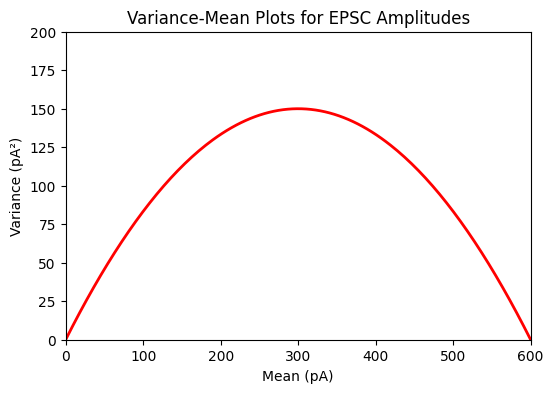

In [ ]:

# Here we simulate data from a binomial model and fit to recover parameters

import numpy as np
import matplotlib.pyplot as plt

# Parameters (scaled to fill axes)
N = 40              # number of release sites (increased for wider x-range)
q = 15              # quantal size (increased for wider x-range)
p_vals = np.linspace(0, 1, 200)  # range of release probabilities, more points for smoothness

# Calculate mean and variance
mean_currents = N * p_vals * q
variances = N * p_vals * q * (1 - p_vals)

# Plot
plt.figure(figsize=(6,4))
plt.plot(mean_currents, variances, color='red', lw=2)
plt.xlabel('Mean (pA)')
plt.ylabel('Variance (pA²)')
plt.title('Variance-Mean Plots for EPSC Amplitudes')
plt.xlim(0, 600)
plt.ylim(0, 200)